# K-Means vs. Mini-batch K-Means Clustering: _MNIST_ dataset

In [61]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
# Load MNIST dataset-
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training data shape: {X_train.shape} & test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28) & test data shape: (10000, 28, 28)


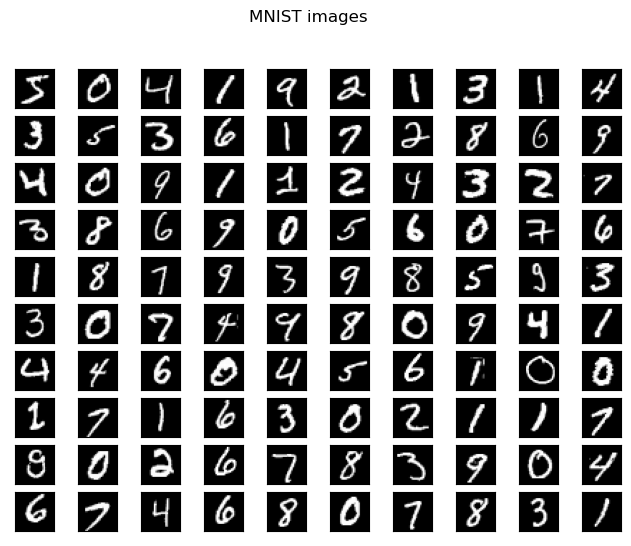

In [5]:
plt.figure(figsize = (8, 6))
for i in range(100):
    # 10 rows & 10 columns-
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    # plt.set_title(f"{y_train[i]}")
    
    # get current axes-
    ax = plt.gca()

    # hide x-axis-
    ax.get_xaxis().set_visible(False)

    # hide y-axis-
    ax.get_yaxis().set_visible(False)
    
plt.suptitle("MNIST images")
plt.show()

In [10]:
# Convert each image to 1 dimensional array-
X_train = X_train.reshape(-1, 28 * 28 * 1)

# Normalize the data to 0 - 1
X_train = X_train.astype(float) / 255.0

In [11]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [ ]:
"""
distance_measures = [
    'euclidean', 'squared euclidean', 'manhattan',
    'chebyshev', 'canberra', 'chi-square'
]
"""

# http://damir.cavar.me/pynotebooks/Python_Clustering_with_Scikit-learn.html

In [49]:
# Ininitialize K-Means algo-
model_kmeans = KMeans(
    n_clusters = len(set(y_train)), init = 'k-means++',
    n_init = 10, max_iter = 300,
    tol = 0.0001, algorithm = 'lloyd',
)

In [50]:
model_kmeans.fit(X_train)

KMeans(n_clusters=10)

In [52]:
# Centroids of cluster centers-
model_kmeans.cluster_centers_.shape

(10, 784)

In [54]:
model_kmeans.labels_.shape

(60000,)

In [55]:
# Get indices for cluster labels equal to 0-
np.where(model_kmeans.labels_ == 0)

(array([    5,    16,    25, ..., 59983, 59985, 59991]),)

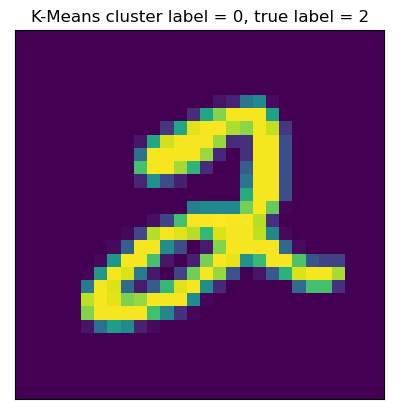

In [56]:
plt.imshow((X_train[5] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[5]}")
plt.show()

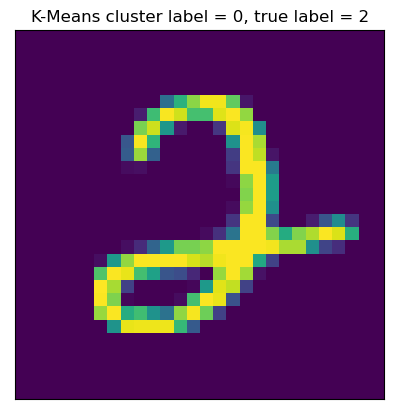

In [57]:
plt.imshow((X_train[16] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[16]}")
plt.show()

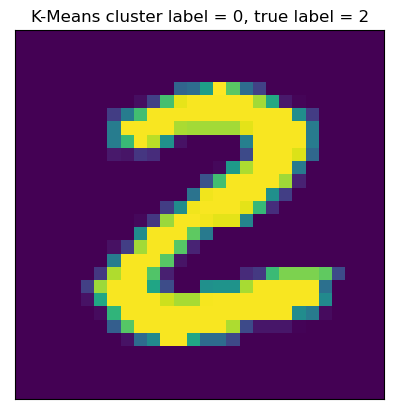

In [58]:
plt.imshow((X_train[25] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[25]}")
plt.show()

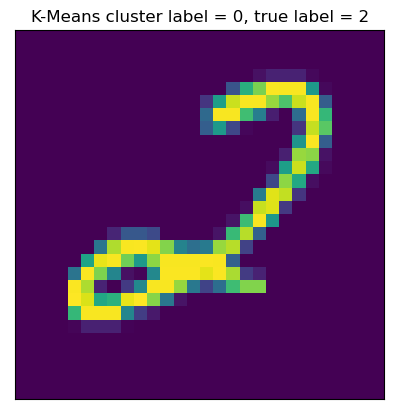

In [59]:
plt.imshow((X_train[59991] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[59991]}")
plt.show()

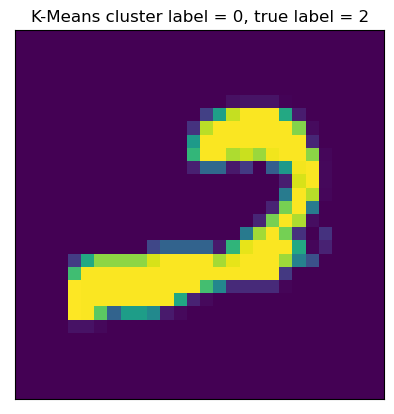

In [60]:
plt.imshow((X_train[59983] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[59983]}")
plt.show()

#### Use _Elbow_ method to find optimal ```k```

The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters.


[hyper-parameter tuning](https://enjoymachinelearning.com/blog/k-means-accuracy-python-silhouette/), [reference](https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html), [sklearn silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), [silhouette analysis](https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/)

In [64]:
inertia = []
ss_scores = []

for k in range(2, 16):
    model = KMeans(
        n_clusters = k, init = 'k-means++',
    )
    model.fit(X_train)
    silhouette_score_average = silhouette_score(X_train, model.predict(X_train))
    
    print(f"k = {k}, inertia = {model.inertia_:.4f} & avg silhouette score = "
          f"{silhouette_score_average:.4f}")
    inertia.append(model.inertia_)
    ss_scores.append(silhouette_score_average)
    

k = 2, inertia = 2960780.5956 & avg silhouette score = 0.0870
k = 3, inertia = 2816456.4637 & avg silhouette score = 0.0537
k = 4, inertia = 2707245.3010 & avg silhouette score = 0.0605
k = 5, inertia = 2605960.5069 & avg silhouette score = 0.0665
k = 6, inertia = 2533295.5785 & avg silhouette score = 0.0650
k = 7, inertia = 2479887.8970 & avg silhouette score = 0.0662
k = 8, inertia = 2432393.8091 & avg silhouette score = 0.0731
k = 9, inertia = 2388862.0667 & avg silhouette score = 0.0566
k = 10, inertia = 2352826.9215 & avg silhouette score = 0.0584
k = 11, inertia = 2317506.0025 & avg silhouette score = 0.0579
k = 12, inertia = 2288967.9117 & avg silhouette score = 0.0598
k = 13, inertia = 2258198.6435 & avg silhouette score = 0.0597
k = 14, inertia = 2231101.9286 & avg silhouette score = 0.0613
k = 15, inertia = 2205877.7370 & avg silhouette score = 0.0628


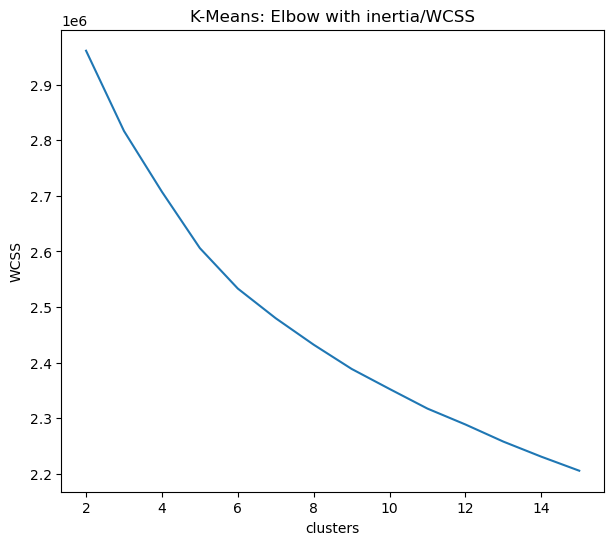

In [69]:
plt.figure(figsize = (7, 6))
plt.plot(list(range(2, 16)), inertia)
plt.xlabel("clusters")
plt.ylabel("WCSS")
plt.title("K-Means: Elbow with inertia/WCSS")
plt.show()

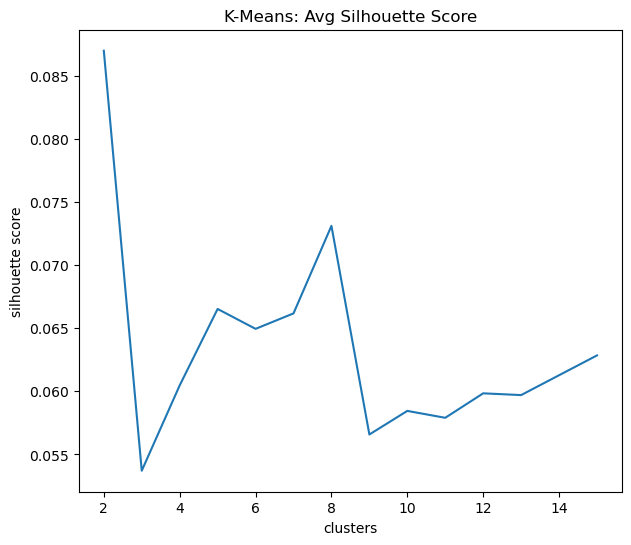

In [71]:
plt.figure(figsize = (7, 6))
plt.plot(list(range(2, 16)), ss_scores)
plt.xlabel("clusters")
plt.ylabel("silhouette score")
plt.title("K-Means: Avg Silhouette Score")
plt.show()

In [16]:
# Initialize mini-batch KMeans algo-
model_kmeans_mini_batch = MiniBatchKMeans(
    n_clusters = len(set(y_train)), init = 'k-means++',
    max_iter = 100, batch_size = 1024,
    compute_labels = True, tol = 0.0,
    max_no_improvement = 10, n_init = 3
)

In [17]:
# Train on training data-
model_kmeans_mini_batch.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [19]:
len(set(model_kmeans_mini_batch.labels_))

10

In [44]:
# Coordinates of cluster centers-
centroids = model_kmeans_mini_batch.cluster_centers_ 

# Cluster label for each data points-
labels = model_kmeans_mini_batch.labels_ 

In [46]:
print(f"Coordinates cluster centers: {centroids.shape}")

Coordinates cluster centers: (10, 784)


In [43]:
# Get indices for cluster label = 0-
np.where(labels == 0)

(array([   26,    38,    44, ..., 59748, 59765, 59771]),)

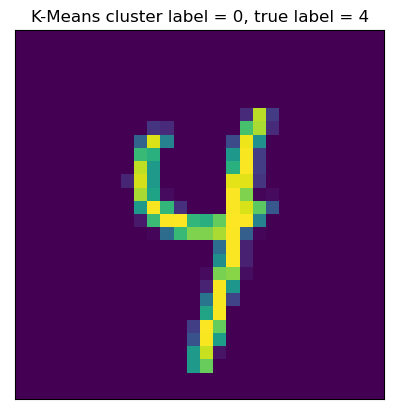

In [38]:
plt.imshow((X_train[26] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[26]}")
plt.show()

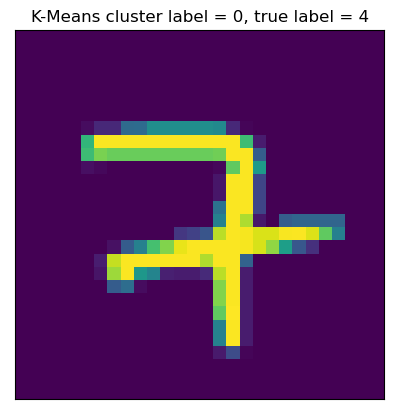

In [39]:
plt.imshow((X_train[38] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[26]}")
plt.show()

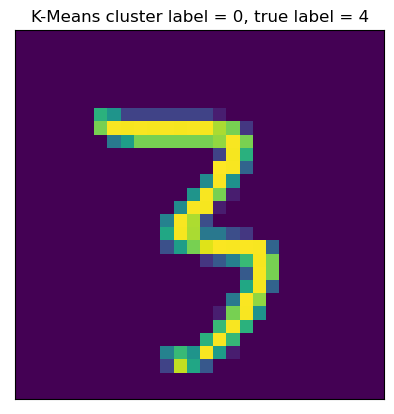

In [40]:
plt.imshow((X_train[44] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[26]}")
plt.show()

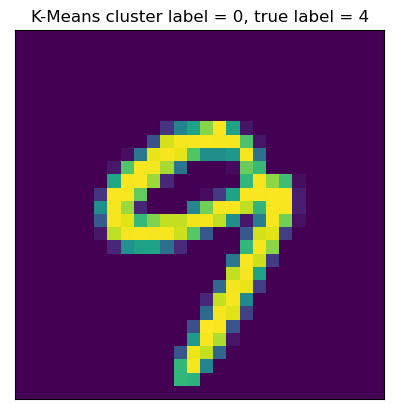

In [41]:
plt.imshow((X_train[59771] * 255.0).reshape(28, 28))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f"K-Means cluster label = 0, true label = {y_train[26]}")
plt.show()

#### Observation

It seems that ```KMeans``` is way better than ```MiniBatchKMeans``` algorithm.